In [ ]:
!pip install matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re
import seaborn as sns 

from math import pi
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings 
warnings.filterwarnings(action = 'ignore')
#패키지 임포트 

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


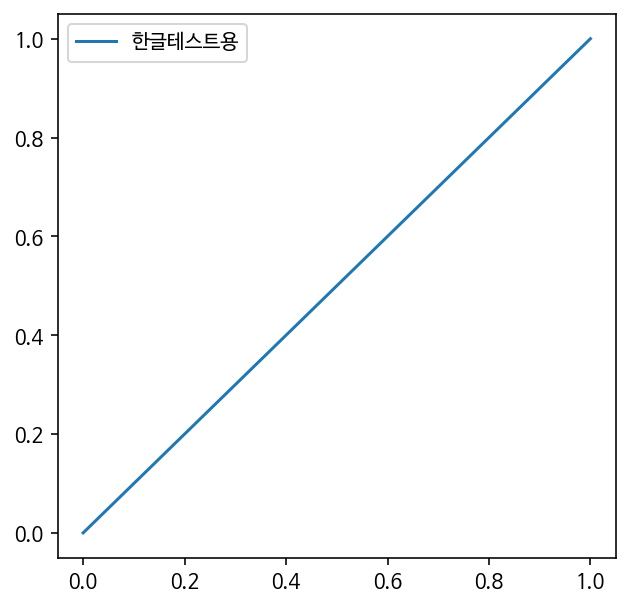

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

구글 드라이브와 Colab을 연동합니다.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
path = "gdrive/My Drive/pytest"

In [ ]:
os.listdir('gdrive/My Drive/pytest')

['201901-202003.csv',
 'stopwords-ko.txt',
 '위험 척도 유형 (해당없음 제거) .csv',
 '학대별 라벨-중복제거.xlsx',
 'model',
 'sentiment_model.h5',
 'sentiment_model1.h5',
 'bert.h5',
 'submission.csv']

In [ ]:
data = pd.read_csv('gdrive/My Drive/pytest/201901-202003.csv')
sub = pd.read_csv('gdrive/My Drive/pytest/submission.csv')

In [ ]:
data.head()
# REG_YYMM :년월
# CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)
# CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)
# STD_CLSS_NM : 업종명
# HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)
# HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)
# AGE: 연령대
# SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)
# FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
# CSTMR_CNT : 이용고객수 (명)
# AMT : 이용금액 (원) - 종속변수
# CNT : 이용건수 (건)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [ ]:
data.isnull().sum()
#결측치가 특정 컬럼에만 많음 

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [ ]:
data['CARD_SIDO_NM'].unique()
#시도의 고유한 값들 

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [ ]:
data['STD_CLSS_NM'].unique()
# 다양한 업종이 존재 

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업',
       '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업',
       '면세점', '버스 운송업', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업',
       '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업'], dtype=object)

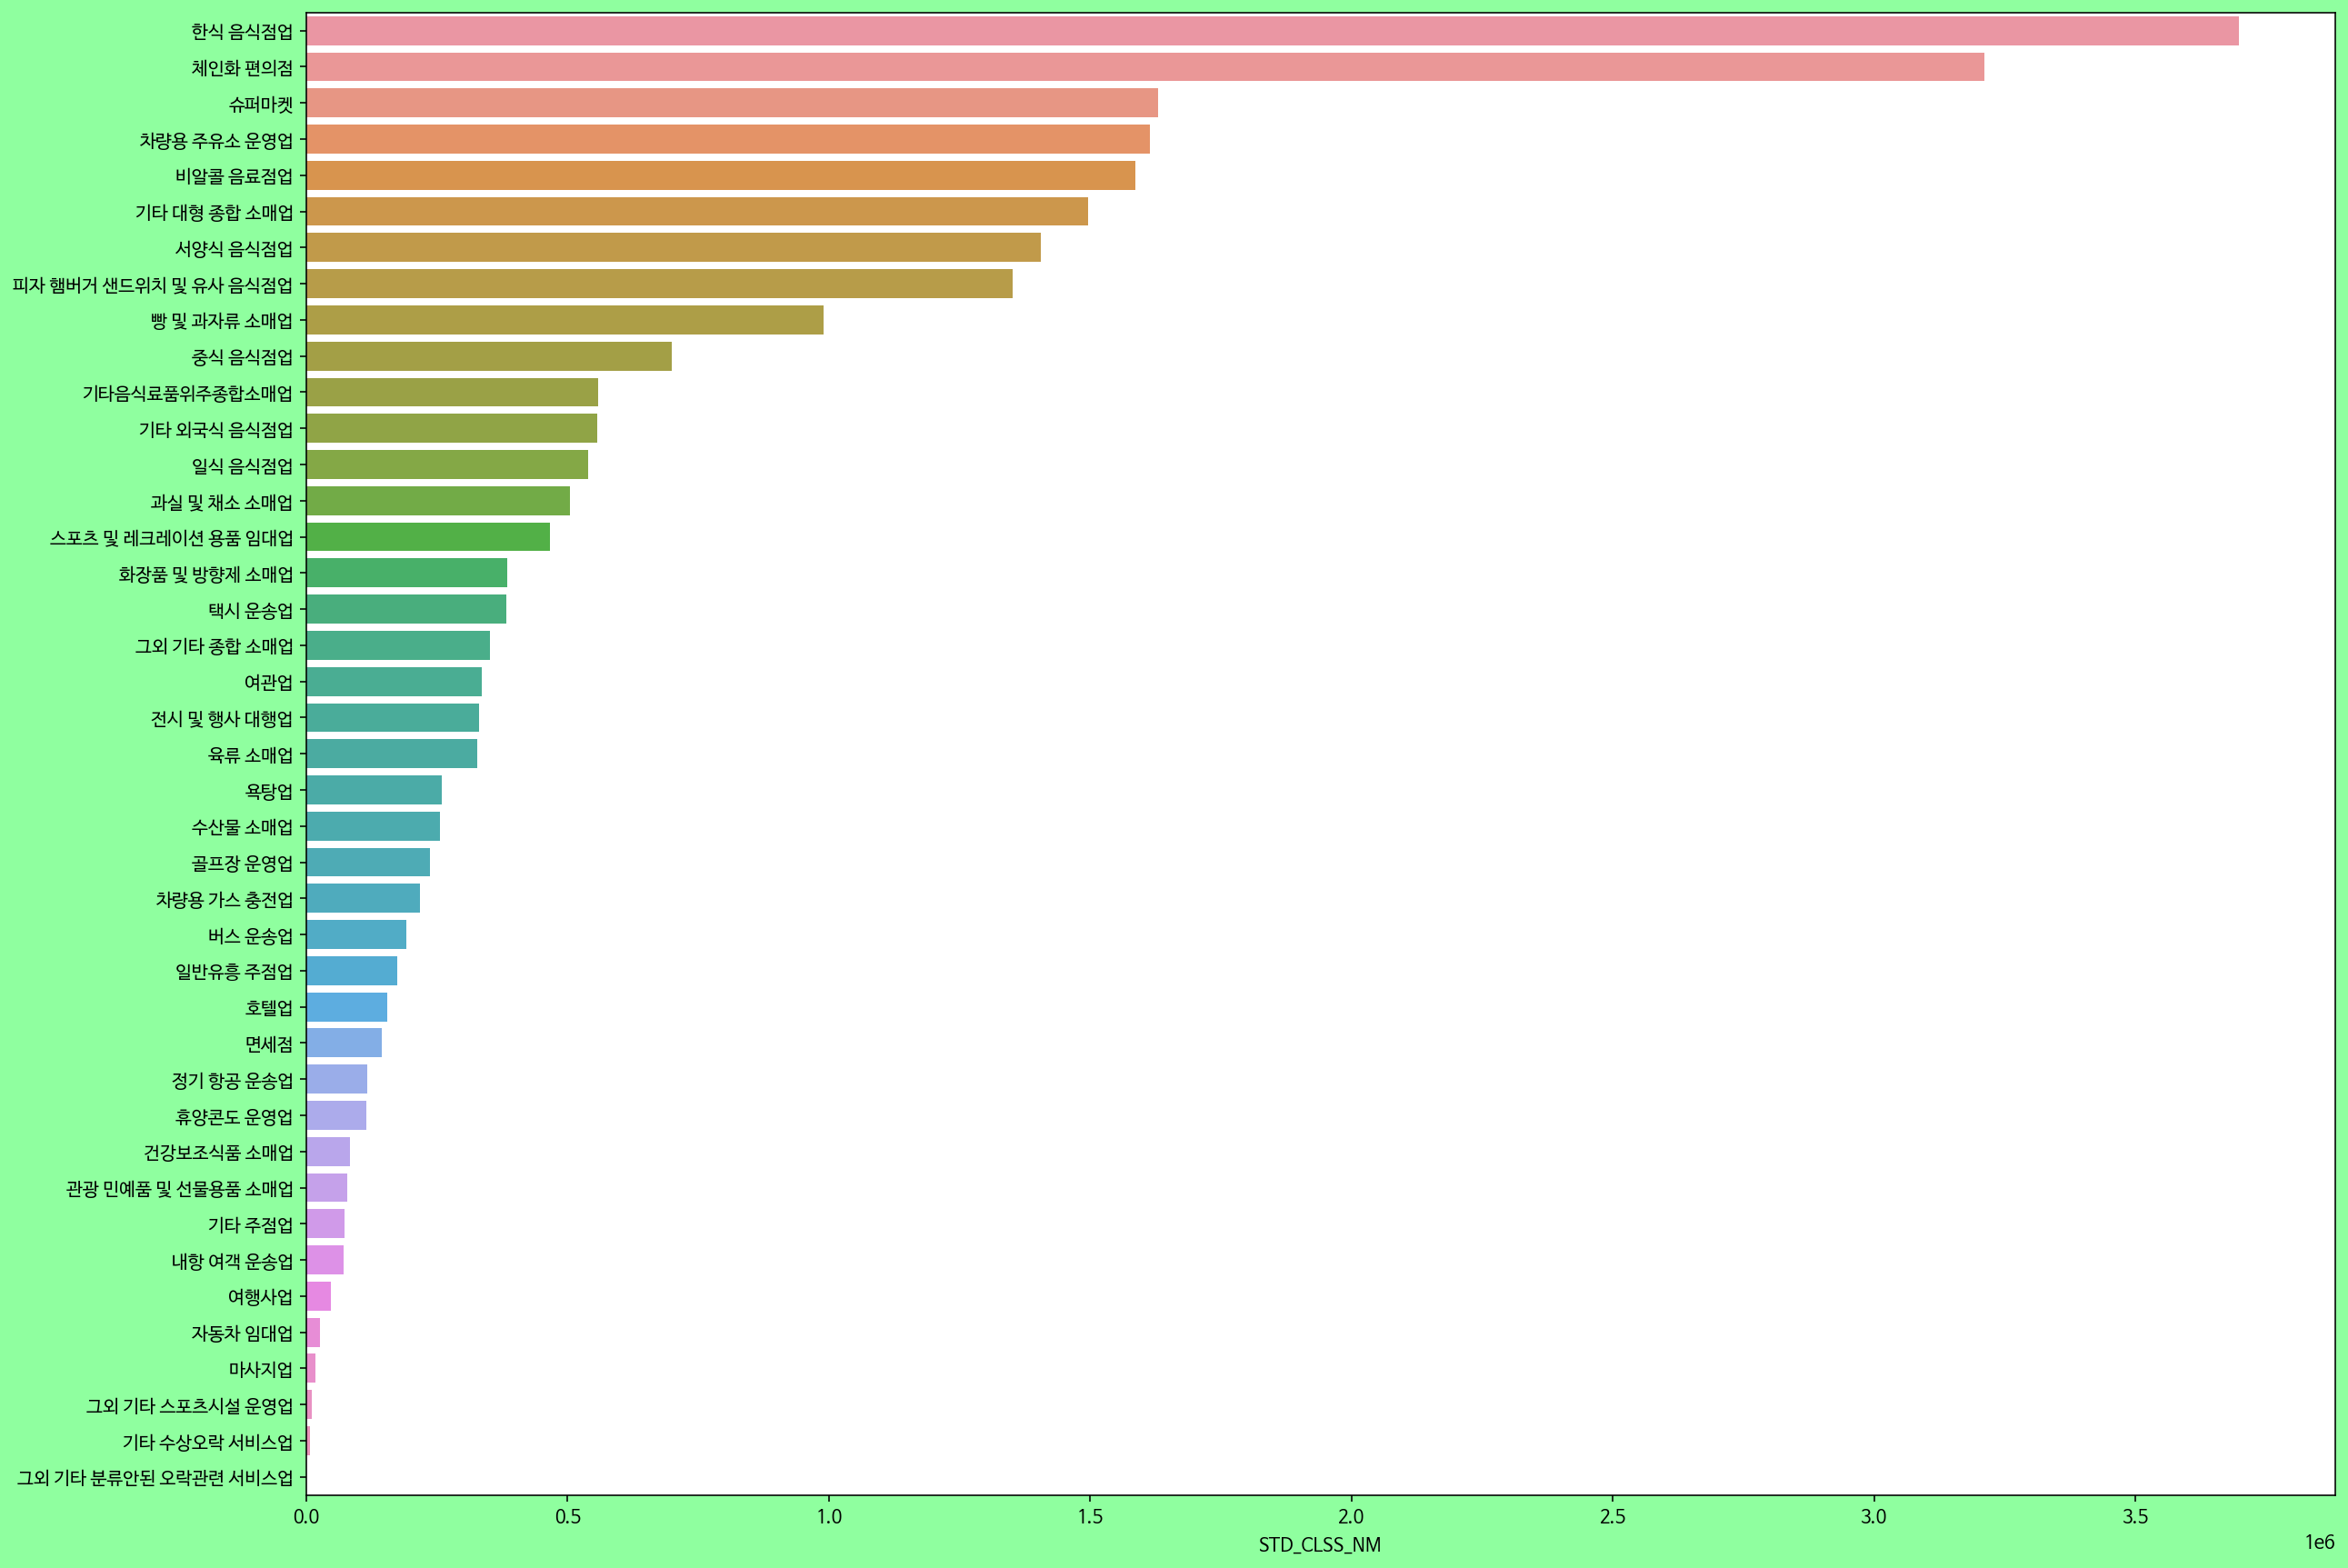

In [ ]:
fig = plt.figure(figsize = (20, 15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y = data['STD_CLSS_NM'].value_counts().index, x = data['STD_CLSS_NM'].value_counts())
## 이렇게 barplot을 그릴 수 있다는거 공부하기(중요)
# 특정 업종의 빈도가 높은 것을 볼 수 있다.

In [ ]:
city_count= data.groupby(['CARD_SIDO_NM','CARD_CCG_NM'])['STD_CLSS_NM'].value_counts().reset_index(name='count')
city_count.head()
#시,도와 시,군,구를 한꺼번에 분류하니 직관성이 떨어짐 
#시,도로 구분하는게 좋을 듯 

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,count
0,강원,강릉시,한식 음식점업,24490
1,강원,강릉시,체인화 편의점,20117
2,강원,강릉시,비알콜 음료점업,13013
3,강원,강릉시,서양식 음식점업,12398
4,강원,강릉시,기타 대형 종합 소매업,10258


In [ ]:
city_sum = city_count.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['count'].sum().reset_index(name='sum')
city_sum.head()
#시,도로 했을때 훨씬 직관성이 좋음 

,CARD_SIDO_NM,STD_CLSS_NM,sum
0,강원,건강보조식품 소매업,1480
1,강원,골프장 운영업,32089
2,강원,과실 및 채소 소매업,27154
3,강원,관광 민예품 및 선물용품 소매업,4428
4,강원,그외 기타 분류안된 오락관련 서비스업,2


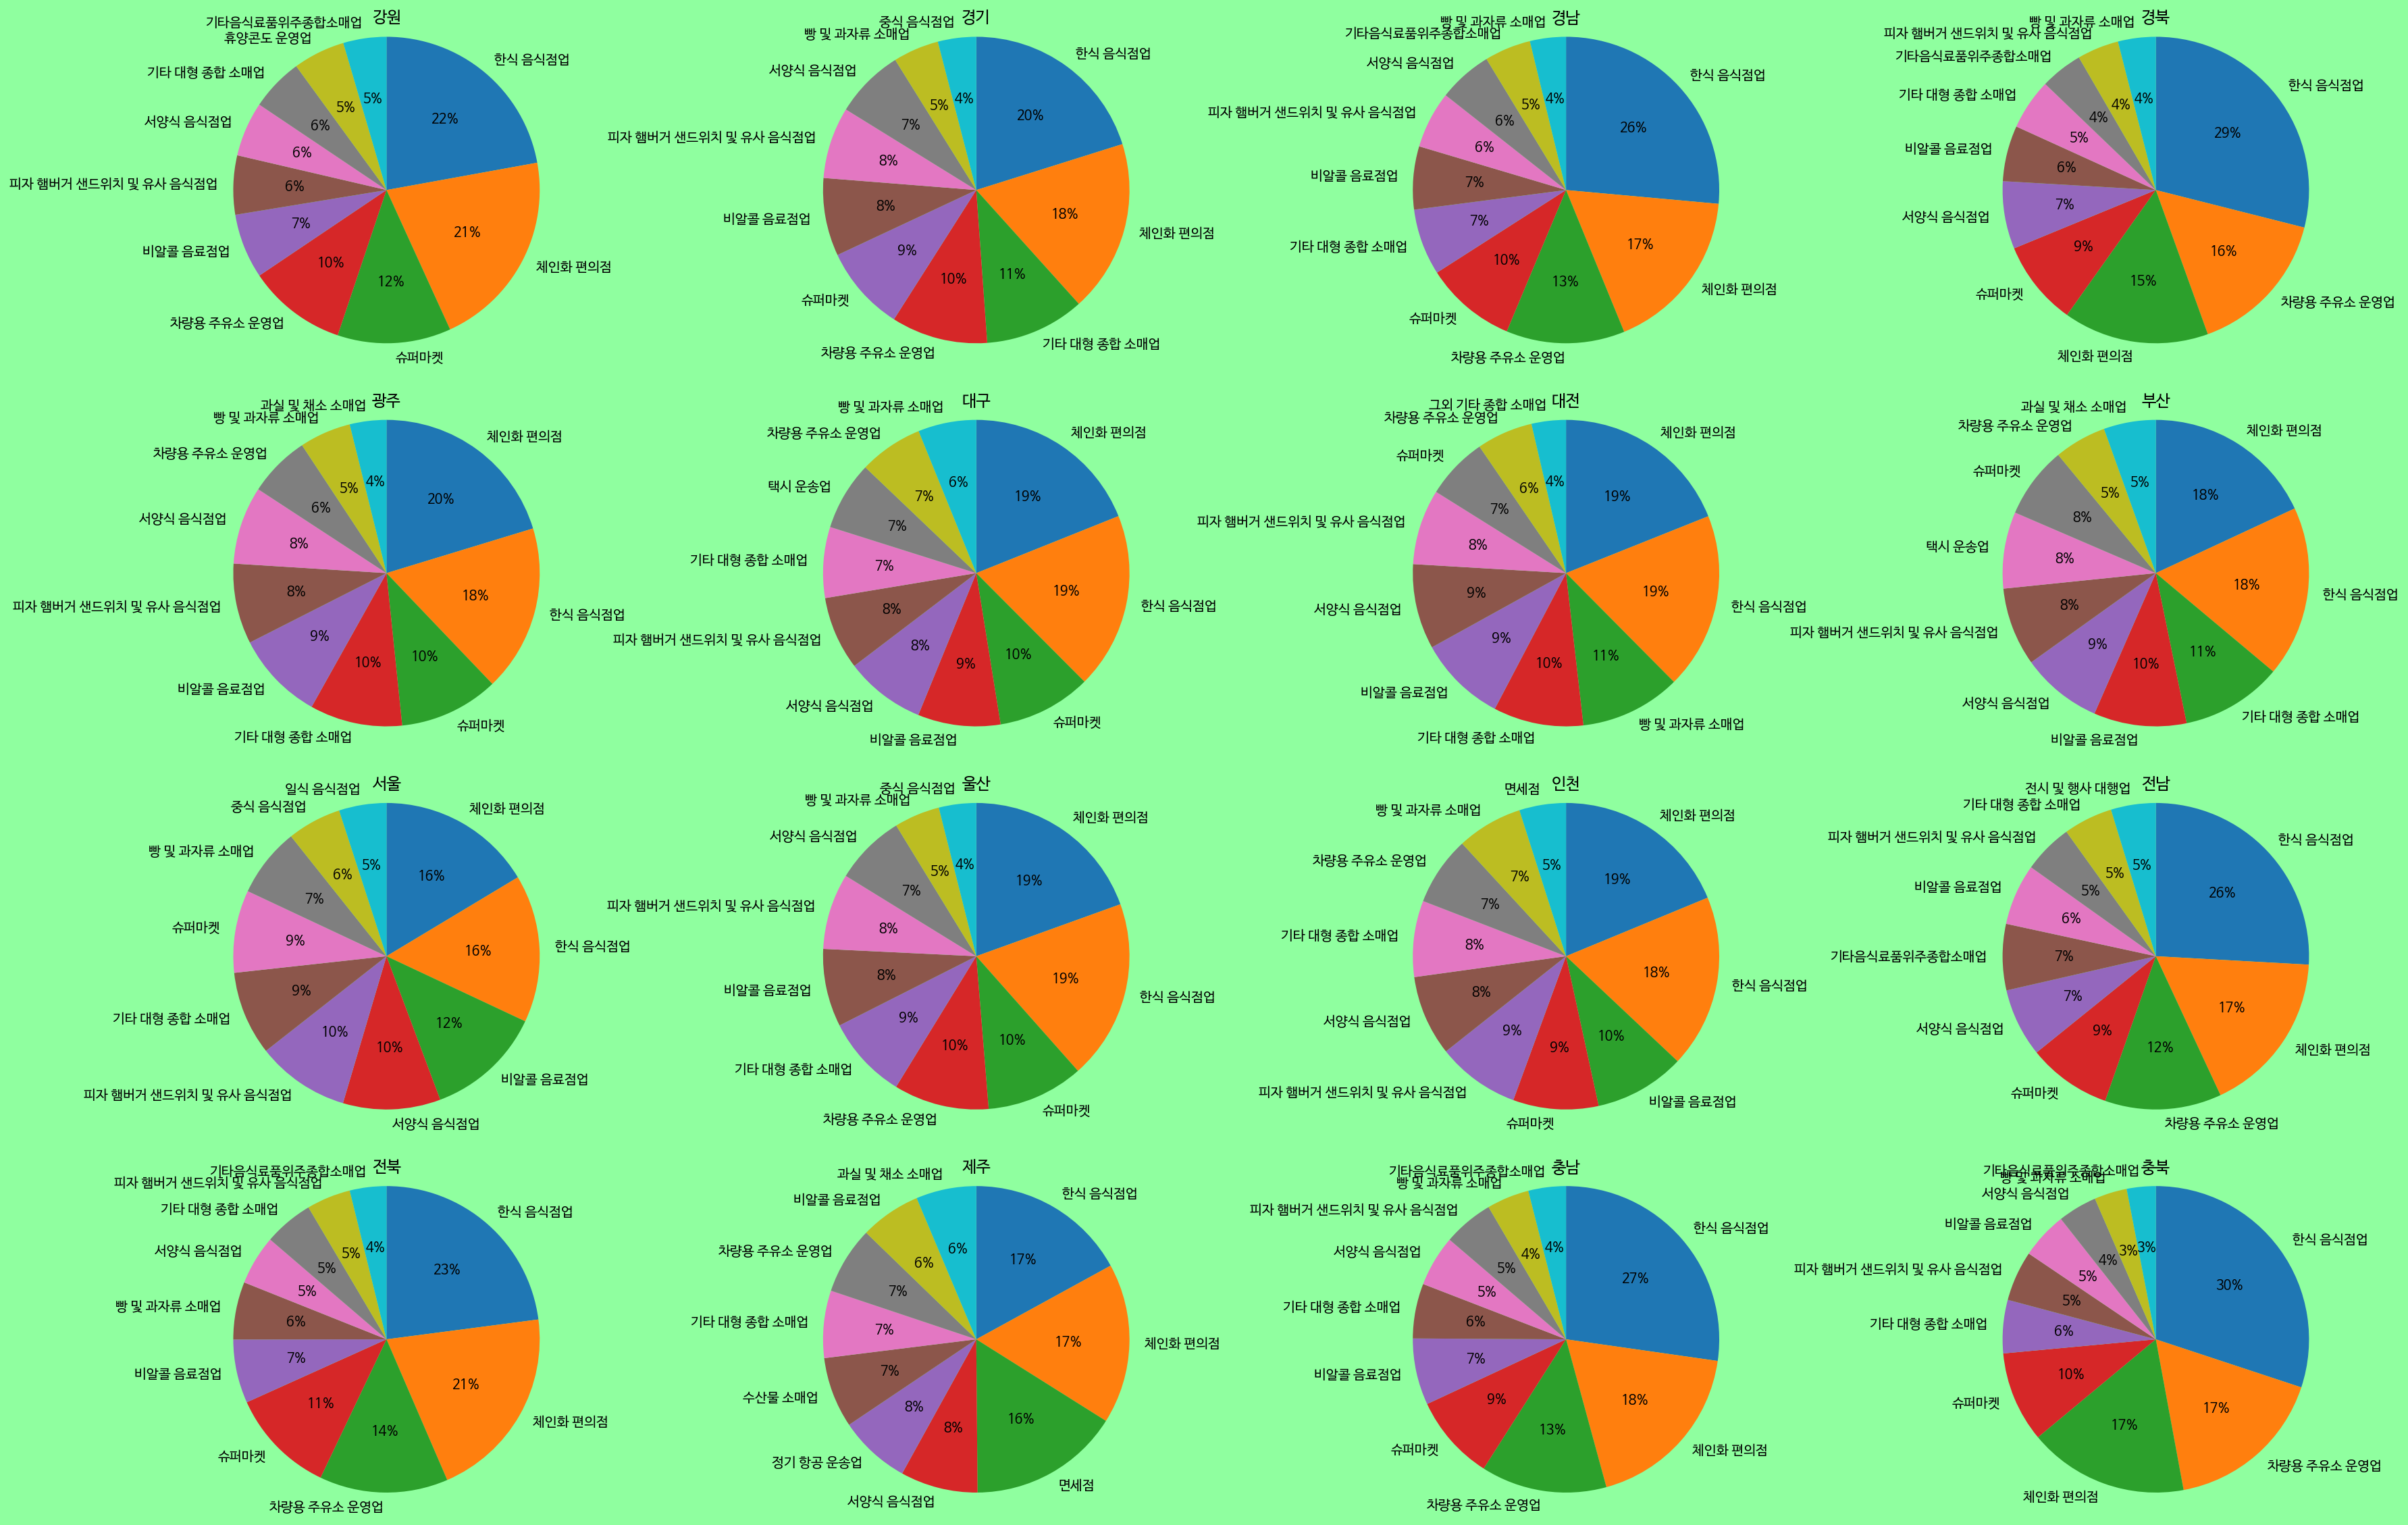

In [ ]:
fig,axs = plt.subplots(4, 4)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:mint green')

for idx,city in enumerate(city_sum['CARD_SIDO_NM'].unique()):
  if idx <=3:
    axs[0, idx].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[0, idx].title.set_text(city)
  if idx > 3 and idx <=7:
    axs[1, idx-4].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[1, idx-4].title.set_text(city)
  if idx > 7 and idx <= 11:
    axs[2, idx-8].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[2, idx-8].title.set_text(city)
  if idx > 11 and idx <=15:
    axs[3, idx-12].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[3, idx-12].title.set_text(city)

plt.show()
#각 시,도별 업종종류를 파이차트로 그림(for enumerate사용 )

In [ ]:
stuff = data.groupby('STD_CLSS_NM')[["CNT", "CSTMR_CNT"]].sum().reset_index()
stuff.head()
# 각 업종별 이용 건수와 이용자 수
# 이걸 통해서 업종별로 파악 가능 

,STD_CLSS_NM,CNT,CSTMR_CNT
0,건강보조식품 소매업,1097627,921682
1,골프장 운영업,4951383,3649887
2,과실 및 채소 소매업,24497628,15953201
3,관광 민예품 및 선물용품 소매업,593750,482667
4,그외 기타 분류안된 오락관련 서비스업,1410,1258


In [ ]:
def make_bar(data,x_col,y_col):
  fig = plt.figure(figsize = (14, 7))
  fig.patch.set_facecolor('xkcd:mint green')
  sns.barplot(x = x_col,y = y_col,data=data.sort_values(x_col,ascending = False))
  plt.title(x_col)
  plt.show()
#barplot을 만드는 함수를 지정 

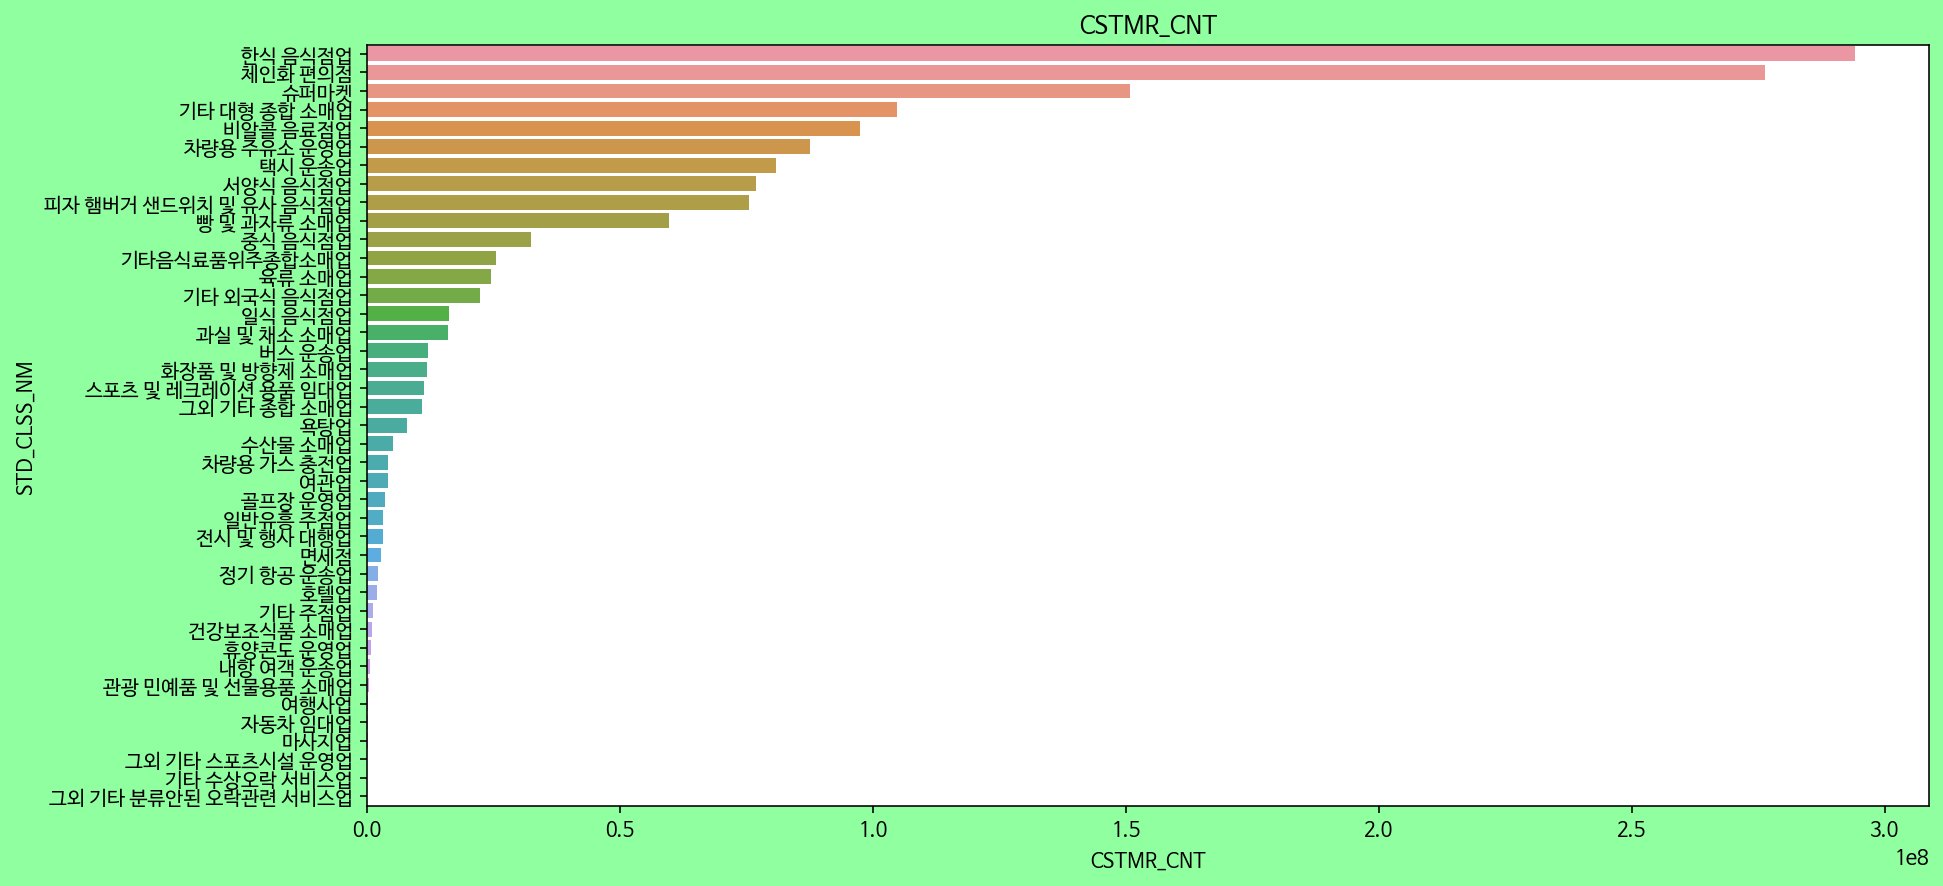

In [ ]:
make_bar(stuff, 'CSTMR_CNT', 'STD_CLSS_NM')
#업종별 이용고객수를 그래프로 보여준다 
#TOP5까지가 이용고객수가 1명이상

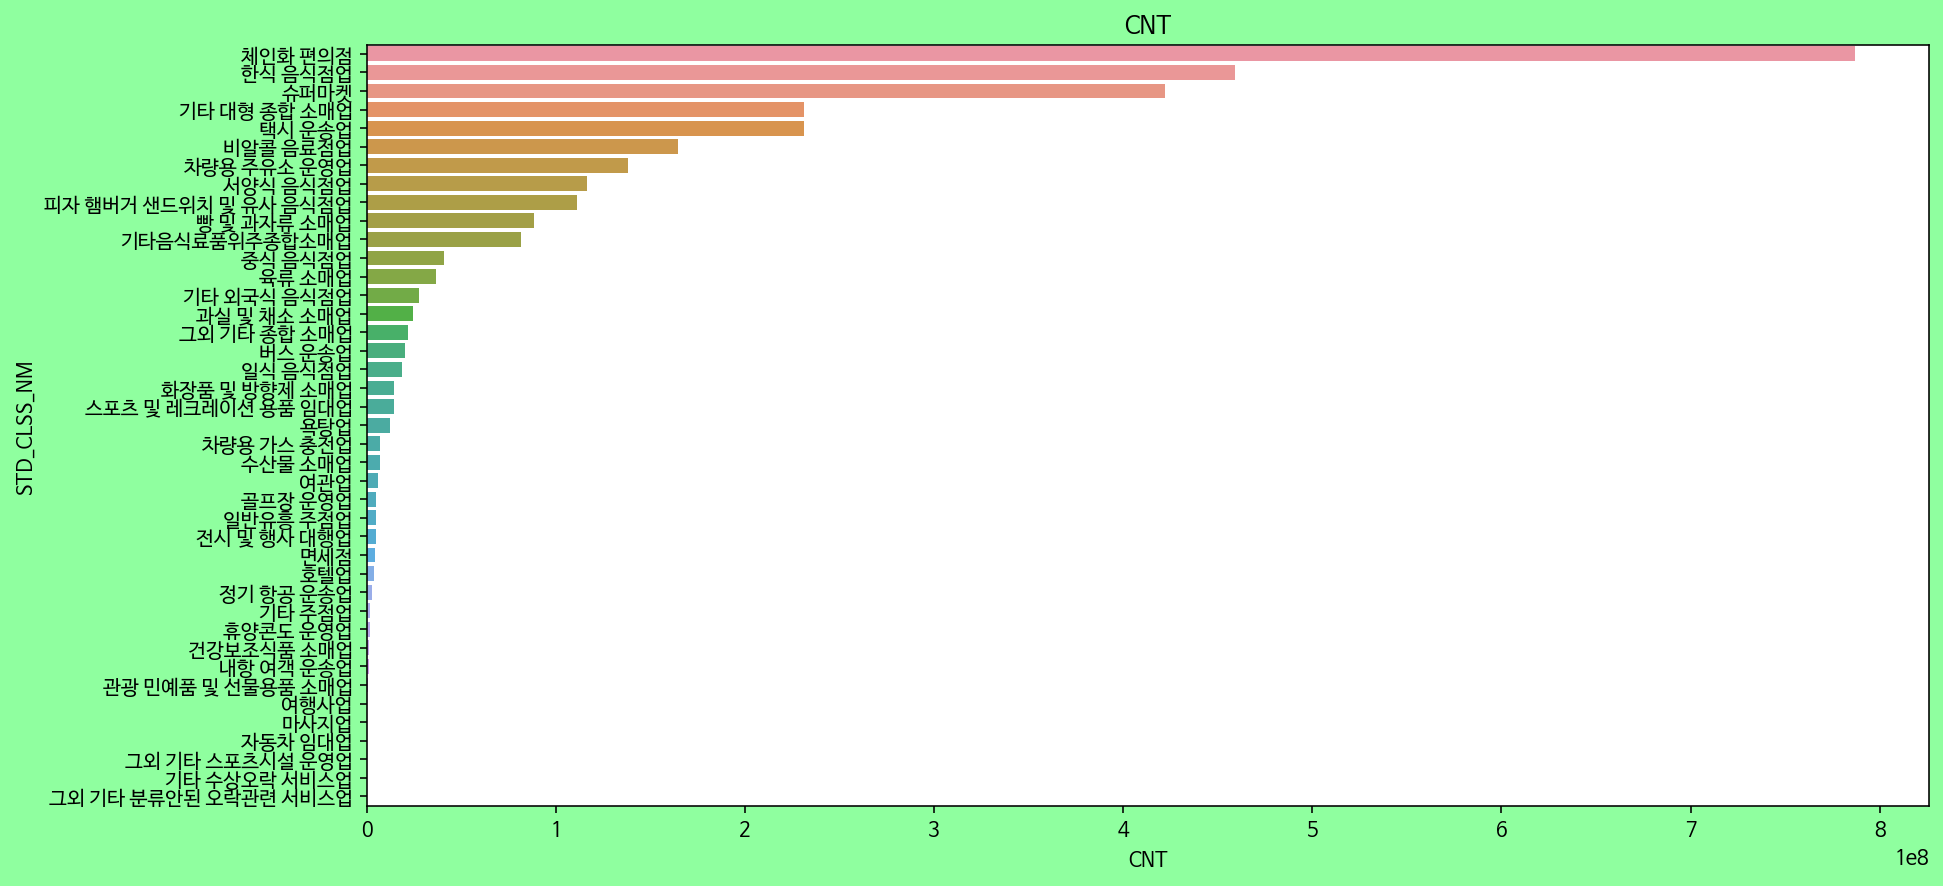

In [ ]:
make_bar(stuff, 'CNT', 'STD_CLSS_NM')
# 업종 별 이용횟수를 보여줌
# 체인화 편의점과  한식 음식점이 고객수와 이용횟수에서 차이를 보임
# 택시 운송업이 올라온 것을 볼 수 있음

In [ ]:
df = data.groupby('CARD_SIDO_NM')[['CSTMR_CNT','CNT']].sum().reset_index()
df.head()

,CARD_SIDO_NM,CSTMR_CNT,CNT
0,강원,35424111,64382529
1,경기,345133871,701143788
2,경남,78397280,149370331
3,경북,59718037,113078004
4,광주,43127377,82758813


In [ ]:
df = data.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])[['CSTMR_CNT','CNT']].sum().reset_index()
df.head()
# 지역에 따른 업종별 이용고객수와 이용건수 
# 이용건수가 이용고객수보다 많은 이유는 다시 재방문을 해도 데이터를 입력하지 않아서라고 추측할 수 있음

,CARD_SIDO_NM,STD_CLSS_NM,CSTMR_CNT,CNT
0,강원,건강보조식품 소매업,15343,16170
1,강원,골프장 운영업,326003,465266
2,강원,과실 및 채소 소매업,318132,428427
3,강원,관광 민예품 및 선물용품 소매업,18764,22012
4,강원,그외 기타 분류안된 오락관련 서비스업,6,10


In [ ]:
df['re_visit']=1 - df['CSTMR_CNT']/df['CNT']
# 재방문율을 나타내는 변수를 새롭게 만듬

In [ ]:
df['re_visit']

0      0.051144
1      0.299319
2      0.257442
3      0.147556
4      0.400000
         ...   
645    0.296910
646    0.308630
647    0.315351
648    0.146661
649    0.398664
Name: re_visit, Length: 650, dtype: float64

In [ ]:
df[df['CARD_SIDO_NM'] == '부산'].sort_values('re_visit',ascending=False).head()
# 재방문율이 높은 순서대로 출력 
# 예상대로 슈퍼마켓이나 편의점이 높게 나온다 

,CARD_SIDO_NM,STD_CLSS_NM,CSTMR_CNT,CNT,re_visit
284,부산,슈퍼마켓,10999167,30731310,0.642086
298,부산,체인화 편의점,20919395,58110317,0.640005
272,부산,기타 수상오락 서비스업,1440,3270,0.559633
271,부산,기타 대형 종합 소매업,13158821,29480247,0.553639
270,부산,그외 기타 종합 소매업,418598,924355,0.547146


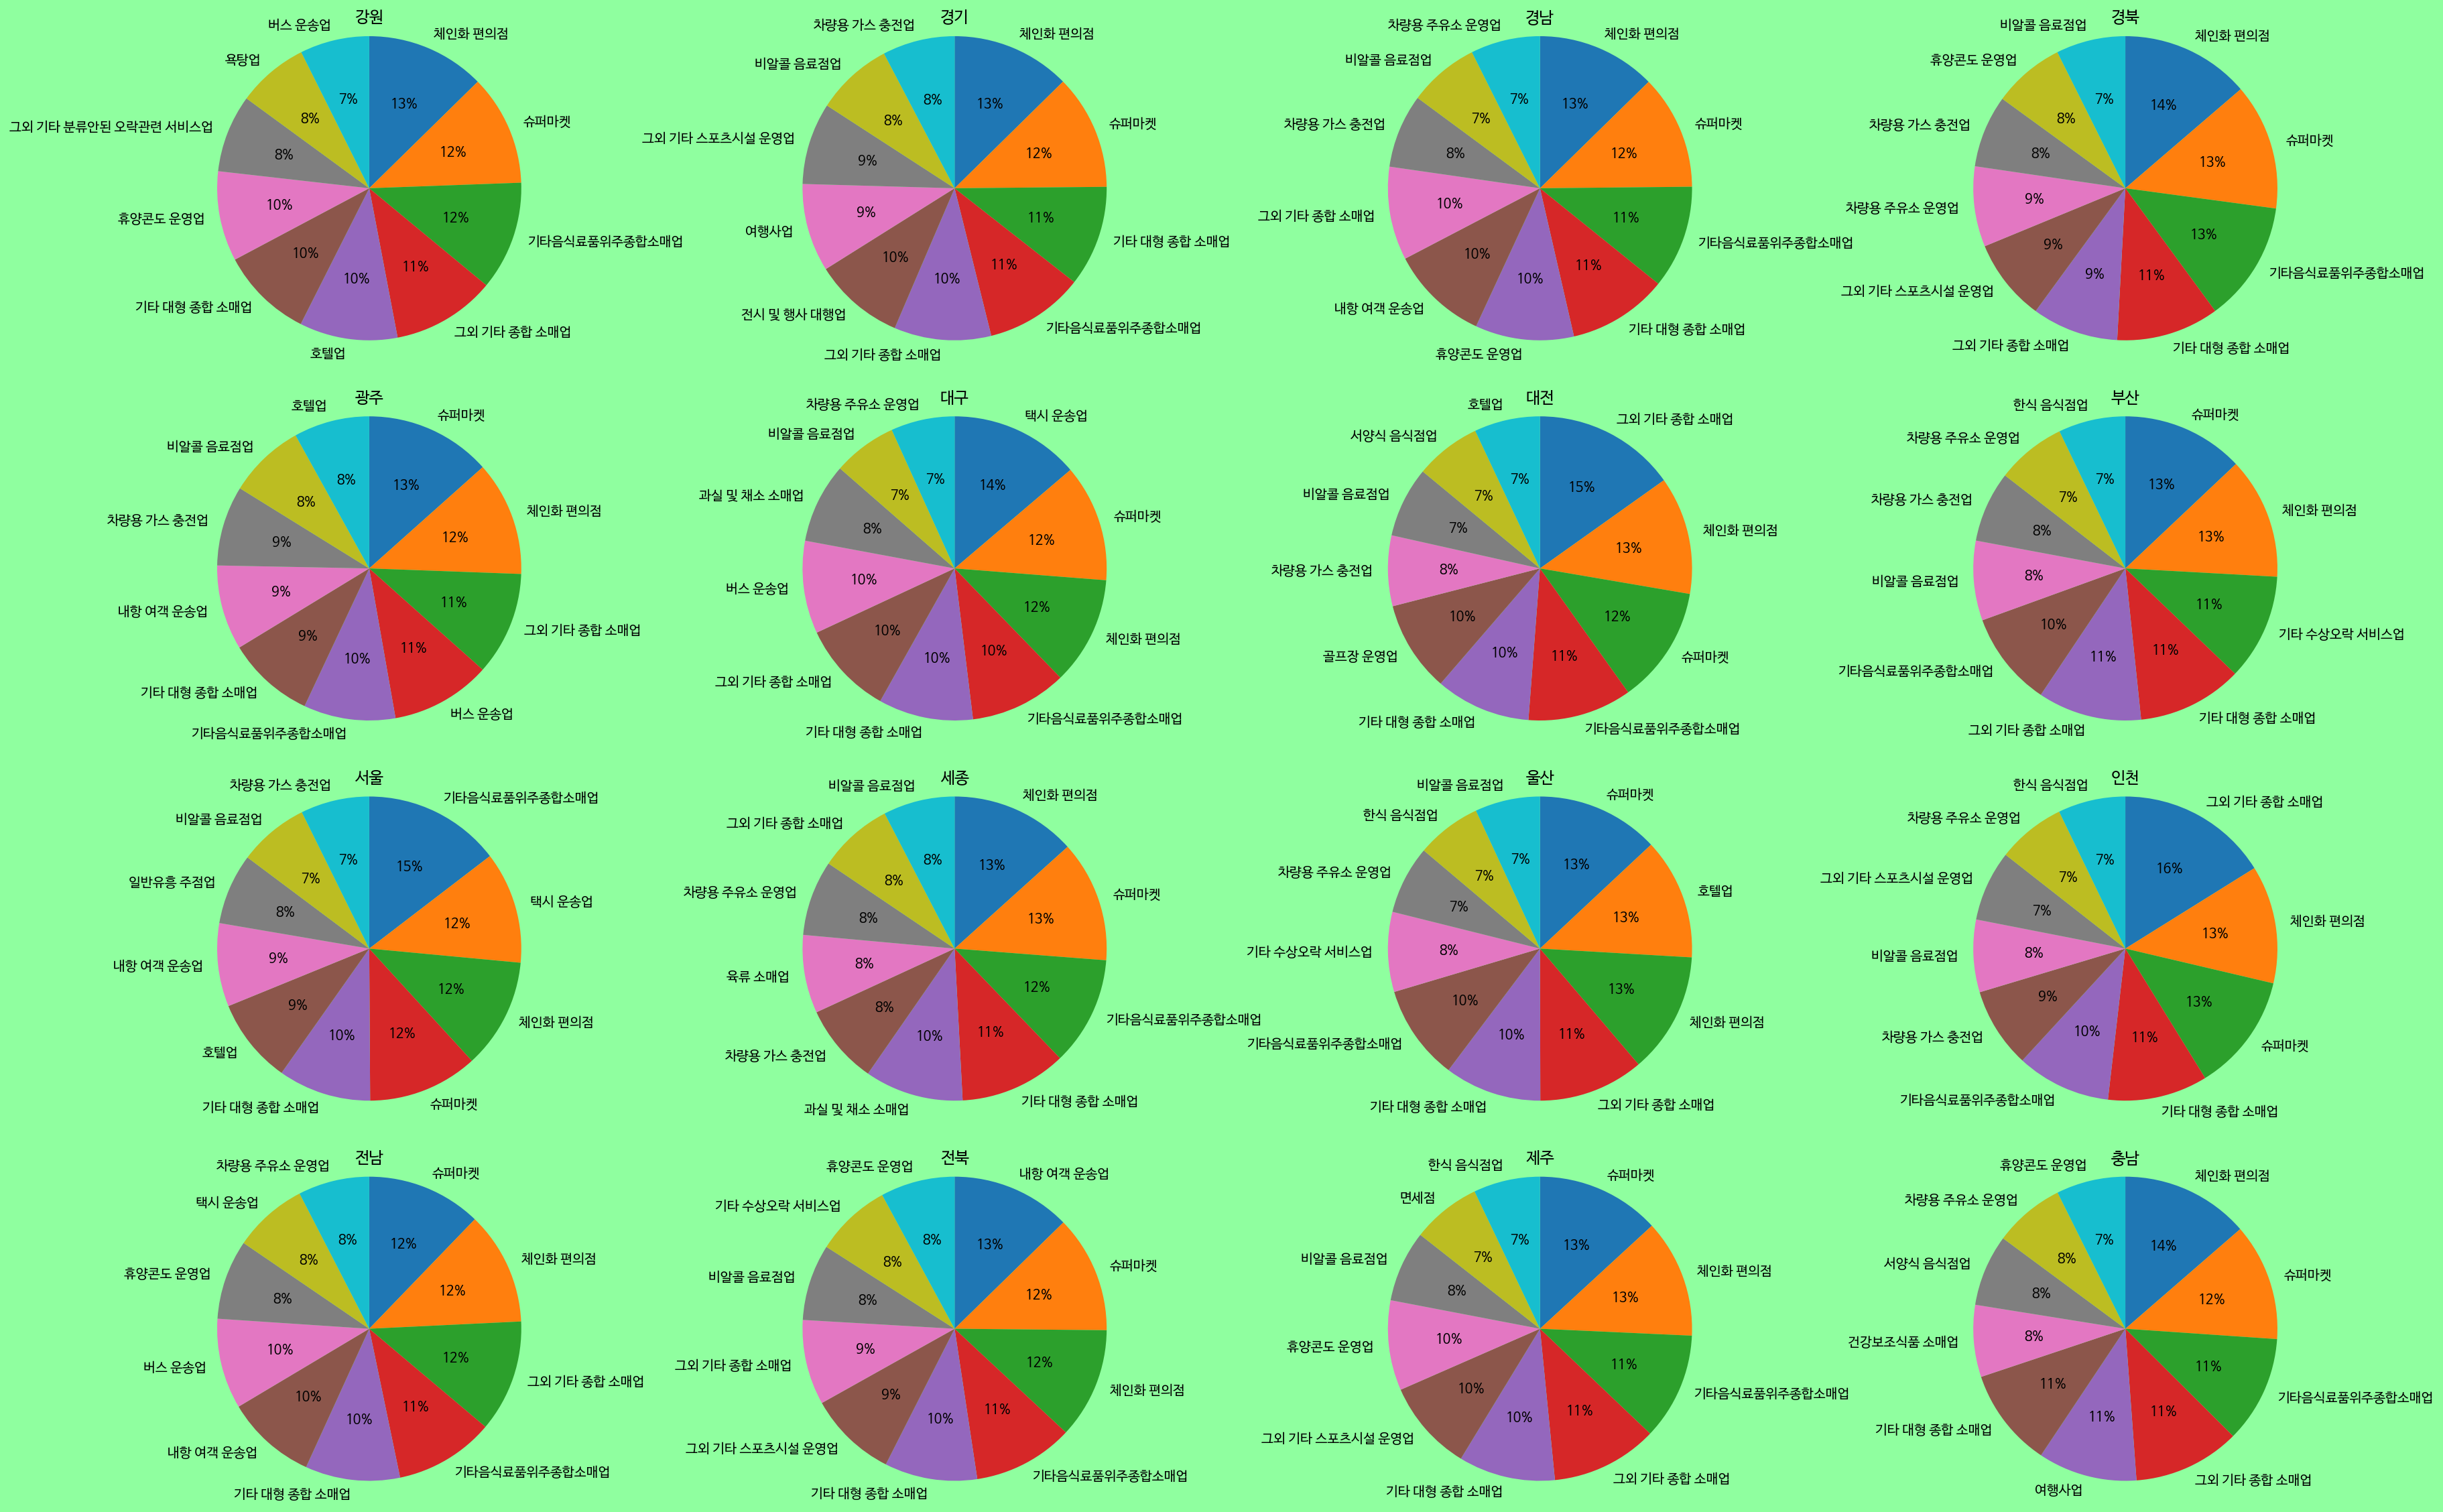

In [ ]:
fig,axs = plt.subplots(4, 4)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:mint green')

for idx,city in enumerate(df['CARD_SIDO_NM'].unique()):
  if idx <=3:
    axs[0, idx].pie(df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['re_visit'],autopct='%.0f%%',
                  labels= df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[0, idx].title.set_text(city)
  if idx > 3 and idx <=7:
    axs[1, idx-4].pie(df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['re_visit'],autopct='%.0f%%',
                  labels= df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[1, idx-4].title.set_text(city)
  if idx > 7 and idx <= 11:
    axs[2, idx-8].pie(df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['re_visit'],autopct='%.0f%%',
                  labels= df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[2, idx-8].title.set_text(city)
  if idx > 11 and idx <=15:
    axs[3, idx-12].pie(df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['re_visit'],autopct='%.0f%%',
                  labels= df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[3, idx-12].title.set_text(city)

#plt.tight_layout()
plt.show()

# 몇몇의 지역을 제외하고는 재방문율이 높은 곳은 슈퍼마켓이나 편의점

In [ ]:
df = data.groupby(['REG_YYMM','STD_CLSS_NM'])[['CSTMR_CNT','CNT']].sum().reset_index()
df.head()
# 업종 별 이용고객수와 이용자 건수 

,REG_YYMM,STD_CLSS_NM,CSTMR_CNT,CNT
0,201901,건강보조식품 소매업,65982,80305
1,201901,골프장 운영업,101473,152181
2,201901,과실 및 채소 소매업,1051062,1597593
3,201901,관광 민예품 및 선물용품 소매업,30059,36811
4,201901,그외 기타 분류안된 오락관련 서비스업,19,27
